## CS-ELEC-ML SA#1
Josh Kenn Viray - 3CSC


### Preliminary Information

Dataset Attributes 
The dataset consists of 13 input features and one target variable: 
Input Features: 
1.  CRIM: Per capita crime rate by town. 
2.  ZN: Proportion of residential land zoned for lots over 25,000 sq.ft. 
3.  INDUS: Proportion of non-retail business acres per town. 
4.  CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). 
5.  NOX: Nitric oxides concentration (parts per 10 million). 
6.  RM: Average number of rooms per dwelling. 
7.  AGE: Proportion of owner-occupied units built prior to 1940. 
8.  DIS: Weighted distances to five Boston employment centers. 
9.  RAD: Index of accessibility to radial highways. 
10. TAX: Full-value property-tax rate per $10,000. 
11. PTRATIO: Pupil-teacher ratio by town. 
12. B: Calculated as 1000(Bk−0.63)21000(Bk - 0.63)^21000(Bk−0.63)2, where BkBkBk is 
the proportion of Black residents by town. 
13. LSTAT: Percentage of lower-status population. 
Target Variable: 
1.  MEDV: Median value of owner-occupied homes in $1000's

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [22]:
# Load the dataset
data = pd.read_csv('./boston.csv')

In [23]:
correlation_matrix = data.corr()
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)
print(correlation_with_medv)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Features (X) - Drop the target variable
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Target Variable (y)
y = data['MEDV']

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Score: {v}")


Feature: CRIM, Score: 0.04078669194141474
Feature: ZN, Score: 0.001170298279743883
Feature: INDUS, Score: 0.006910076536894239
Feature: CHAS, Score: 0.0008925175878510458
Feature: NOX, Score: 0.025000115172984907
Feature: RM, Score: 0.4207144500083647
Feature: AGE, Score: 0.01346605841483399
Feature: DIS, Score: 0.06727713219458561
Feature: RAD, Score: 0.0031617200622207596
Feature: TAX, Score: 0.014926306616348629
Feature: PTRATIO, Score: 0.017453535710769148
Feature: B, Score: 0.010759247098709443
Feature: LSTAT, Score: 0.377481850375279


In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)


[False False False  True  True  True False  True False False  True False
 False]
[4 6 5 1 1 1 9 1 3 7 1 8 2]


In [26]:
df = data[['TAX', # is necessary because it provides us with the value of the property tax 
           'INDUS', # proportion of non-retail property/business within the town
           'MEDV']] # Median value of owner-occupied homes in $1000's

### 1. Exploratory Data Analysis

- Perform EDA to gain insights into the data distribution and relationships between 
features. 
- Visualize correlations between the input features and the target variable (MEDV). 
- Identify and handle any missing data or outliers.

In [27]:
# Display the top and bottom 5 rows of the dataset
pd.concat([data.head(), data.tail()])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

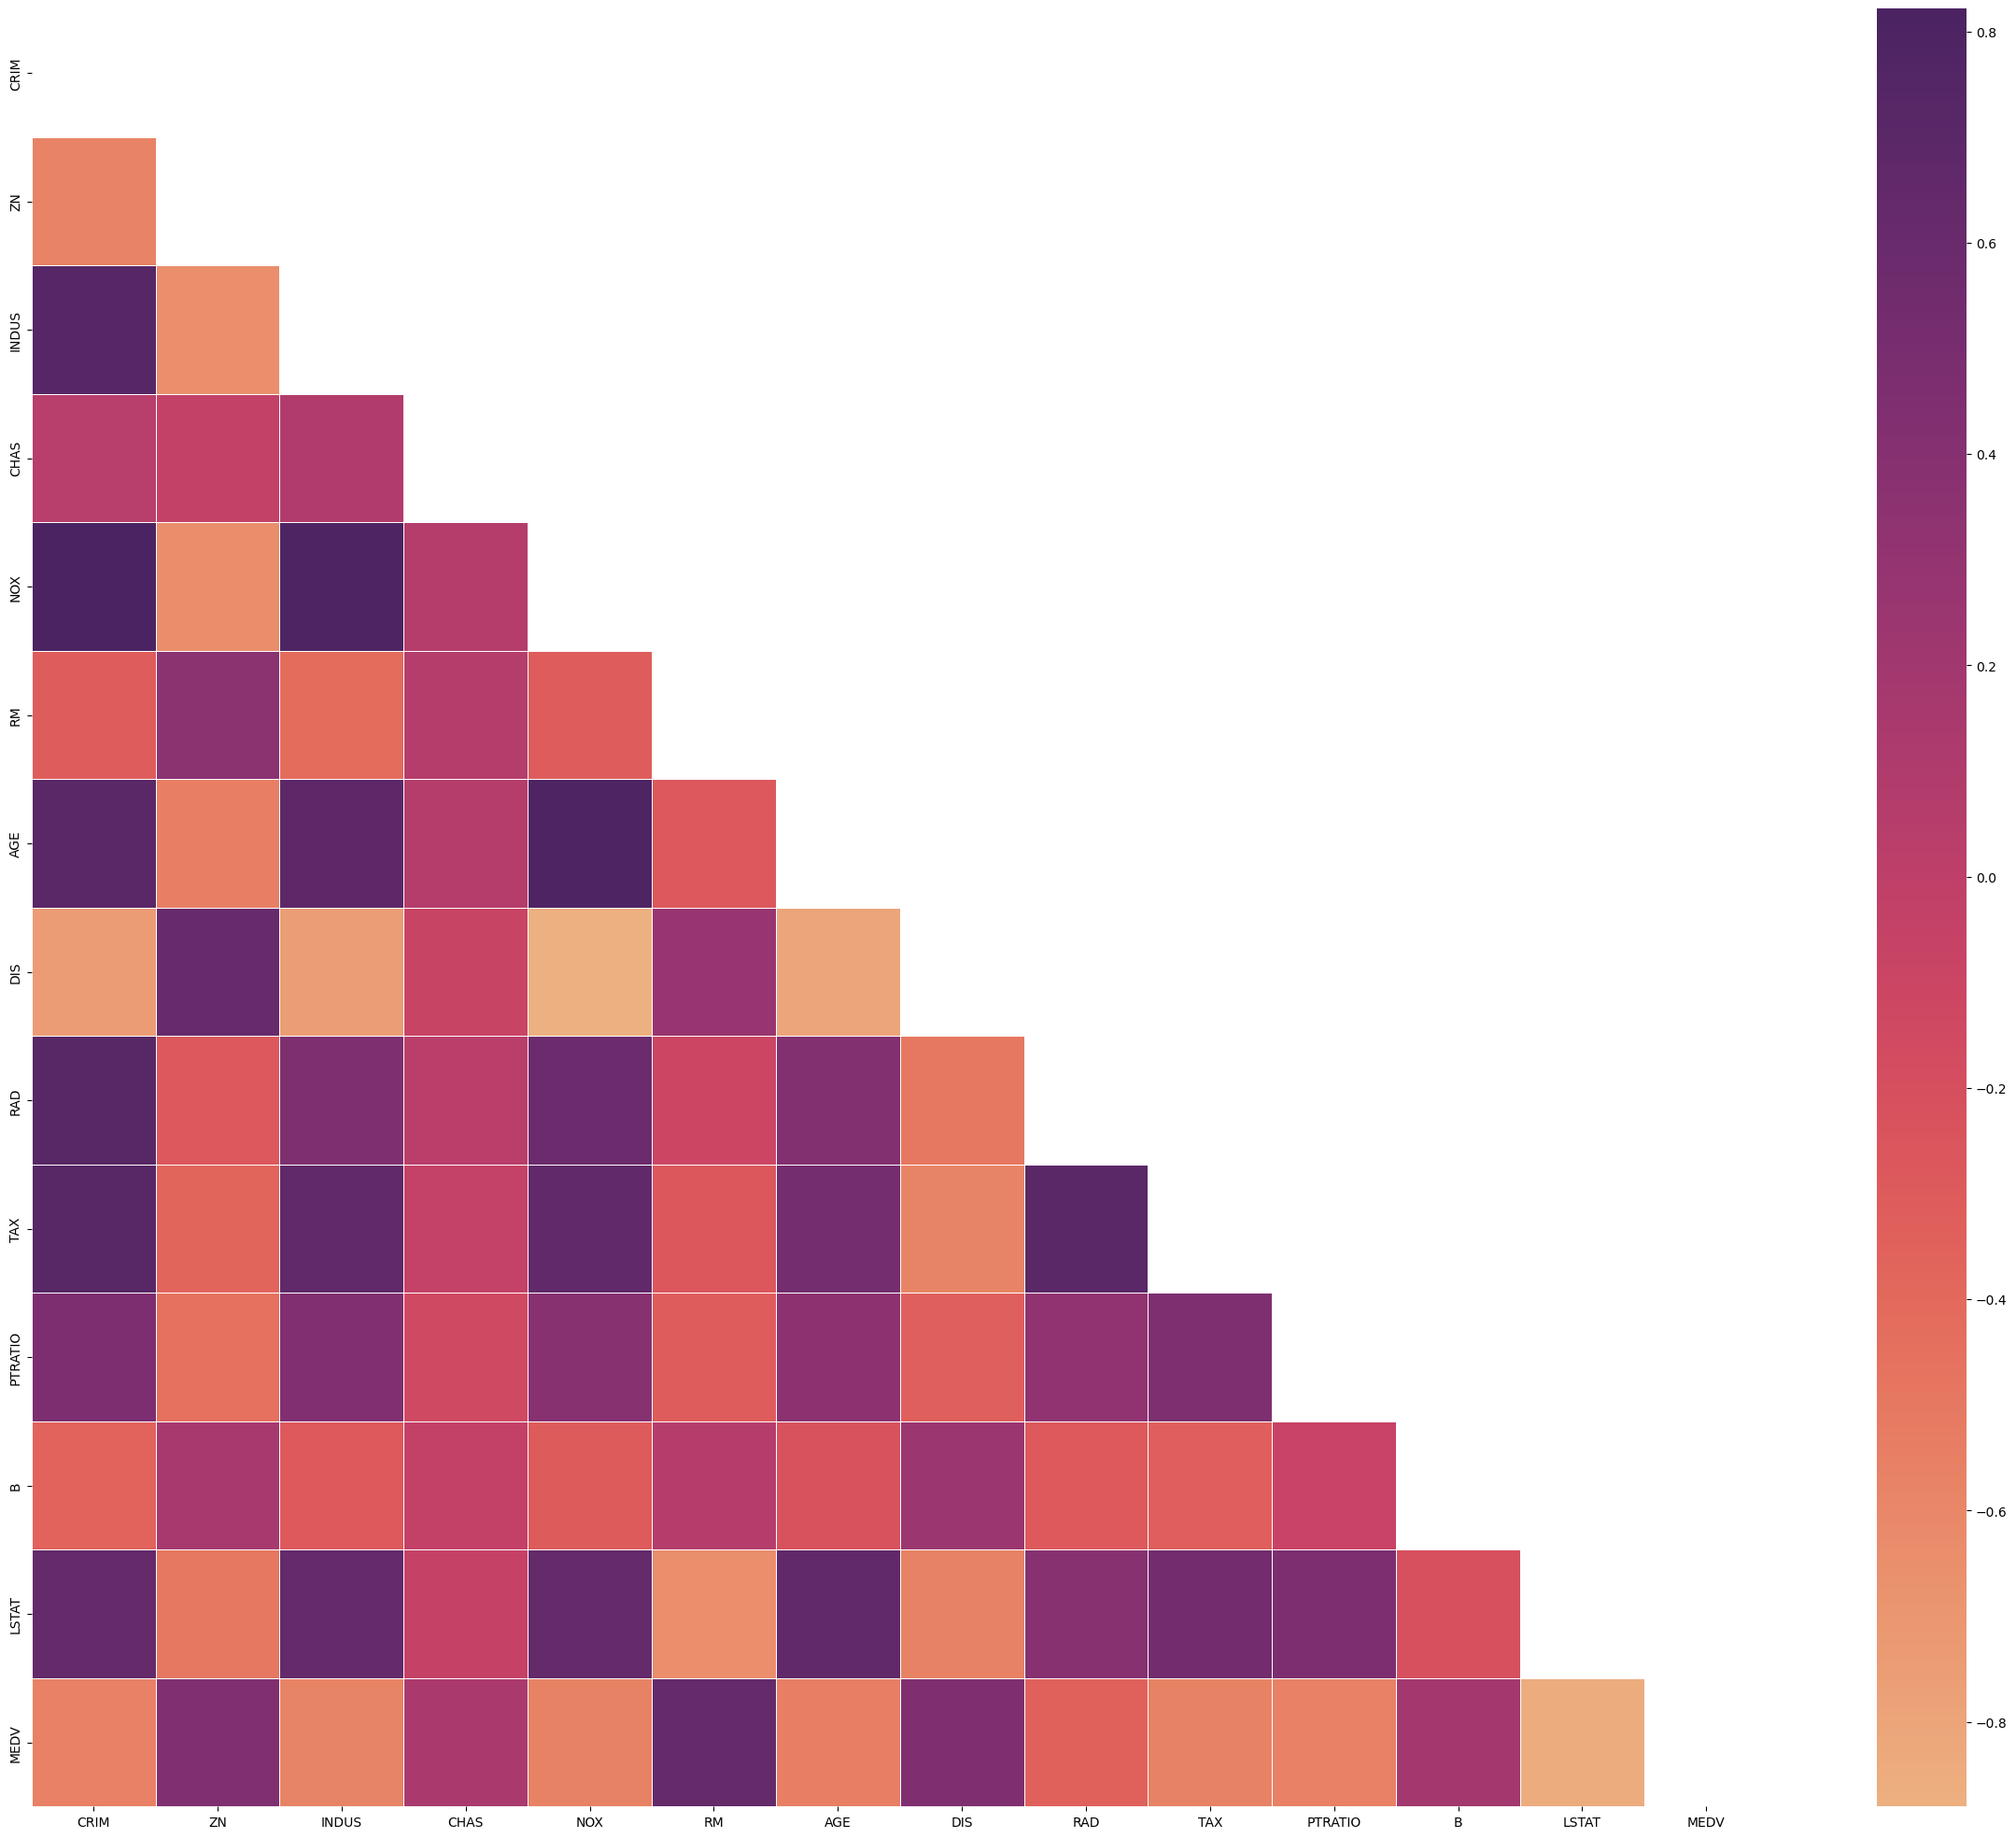

In [28]:
data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(30, 25))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

### 2. Data Preprocessing

- Normalization/Scaling: Apply appropriate scaling techniques to ensure the 
features are on a similar scale, which is crucial for linear models. 
- Encoding: Handle categorical variables (if any) using suitable encoding 
methods. 
- Feature Selection: Analyze feature importance and potentially reduce 
dimensionality by selecting relevant features.

In [29]:
# Check that datatypes of the columns
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

However, since our task is to predict <b>the median value of owner-occupied homes</b> in boston, we need to select a few features as other columns are not necessarily needed.

In [ ]:
categorical_features = ['CHAS', 'RAD']
numerical_features = X.columns.difference(categorical_features)

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])


data_scaled = pd.DataFrame(X_scaled, columns=numerical_features)
data_scaled[categorical_features] = X[categorical_features].reset_index(drop=True)
print(data_scaled.head())

        AGE         B      CRIM       DIS     INDUS     LSTAT       NOX  \
0 -0.120013  0.441052 -0.419782  0.140214 -1.287909 -1.075562 -0.144217   
1  0.367166  0.441052 -0.417339  0.557160 -0.593381 -0.492439 -0.740262   
2 -0.265812  0.396427 -0.417342  0.557160 -0.593381 -1.208727 -0.740262   
3 -0.809889  0.416163 -0.416750  1.077737 -1.306878 -1.361517 -0.835284   
4 -0.511180  0.441052 -0.412482  1.077737 -1.306878 -1.026501 -0.835284   

    PTRATIO        RM       TAX        ZN  CHAS  RAD  
0 -1.459000  0.413672 -0.666608  0.284830     0    1  
1 -0.303094  0.194274 -0.987329 -0.487722     0    2  
2 -0.303094  1.282714 -0.987329 -0.487722     0    2  
3  0.113032  1.016303 -1.106115 -0.487722     0    3  
4  0.113032  1.228577 -1.106115 -0.487722     0    3  


### 3. Model Implementation

- Baseline Model: Start with a simple linear regression model to establish a 
baseline performance. 
- Advanced Models: Implement Ridge Regression, Lasso Regression, and Elastic 
Net to improve the model by addressing overfitting and underfitting issues. 
- Hyperparameter Tuning: Experiment with different hyperparameters (e.g., 
regularization strength) to optimize model performance.

### 4. Model Evaluation

- Evaluate the models using metrics such as Mean Squared Error (MSE), 
R-squared (R²), and Root Mean Squared Error (RMSE). 
- Compare the performance of different models and discuss the trade-offs

### 5. Analysis and Interpretation

- Interpret the coefficients of the linear models to understand the impact of each 
feature on the target variable. 
- Discuss the significance of regularization in reducing overfitting. 
- Provide insights into which features are most influential in predicting housing 
prices.

### 6. Documentation: 
- Submit a comprehensive report detailing your methodology, experiments, results, 
and conclusions. 
- The report should be in a 2-column format (IEEE or ACM) and include sections 
such as Introduction, Methodology, Experiments, Results, and Conclusions